In [177]:
import pandas as pd
from matplotlib import pyplot as plt
from googleapiclient.discovery import build
from IPython.display import JSON
api_key = ''

In [178]:
api_service_name = "youtube"
api_version = "v3"
channel_ids = ['UCCPWi_OwWMR5JTiujn7v-7g','UCvyZS6W6zMJCZBVzF-Ei6sw','UCX6OQ3DkcsbYNE6H8uQQuVA','UCq-Fj5jknLsUf-MWSy4_brA','UC-lHJZR3Gqxm24_Vd_AJ5Yw']
# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [179]:
def get_channel_stats(youtube,channel_ids):
    all_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()
    for items in response['items']:
        data = { 'ChannelName':items['snippet']['title'],
                'Subscribers':int(items['statistics']['subscriberCount']),
                'Views':int(items['statistics']['viewCount']),
                'TotalVideos':int(items['statistics']['videoCount']),
                'PlaylistId':items['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(data)
    return(pd.DataFrame(all_data))
#n = int(input("Enter the number of ID's:"))
#for i in range(n):
   # channel_ids.append(input("Enter the Youtube Channel ID:"))

In [180]:
channelstats = get_channel_stats(youtube,channel_ids)

In [181]:
channelstats.sort_values('Subscribers' , ascending=False).reset_index(drop=True)

,ChannelName,Subscribers,Views,TotalVideos,PlaylistId
0,MrBeast,283000000,52323669105,803,UUX6OQ3DkcsbYNE6H8uQQuVA
1,T-Series,267000000,258148126947,21204,UUq-Fj5jknLsUf-MWSy4_brA
2,PewDiePie,111000000,29316239277,4765,UU-lHJZR3Gqxm24_Vd_AJ5Yw
3,A2D Channel,1510000,363618668,912,UUvyZS6W6zMJCZBVzF-Ei6sw
4,Tamil Gaming தமிழ் கேமிங்,496000,167623539,2866,UUCPWi_OwWMR5JTiujn7v-7g


C:\Users\venka\AppData\Local\Temp\ipykernel_17856\1228484119.py:6: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\venka\AppData\Local\Temp\ipykernel_17856\1228484119.py:6: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.tight_layout()
C:\Users\venka\AppData\Local\Temp\ipykernel_17856\1228484119.py:6: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\venka\AppData\Local\Temp\ipykernel_17856\1228484119.py:6: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\venka\AppData\Local\Temp\ipykernel_17856\1228484119.py:6: UserWarning: Glyph 2996 (\N{TAMIL LETTER LLLA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\venka\AppData\Local\Temp\ipykernel_17856\1228484119.py:6: UserWarning: Glyph 3021 (\N{TAMIL SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

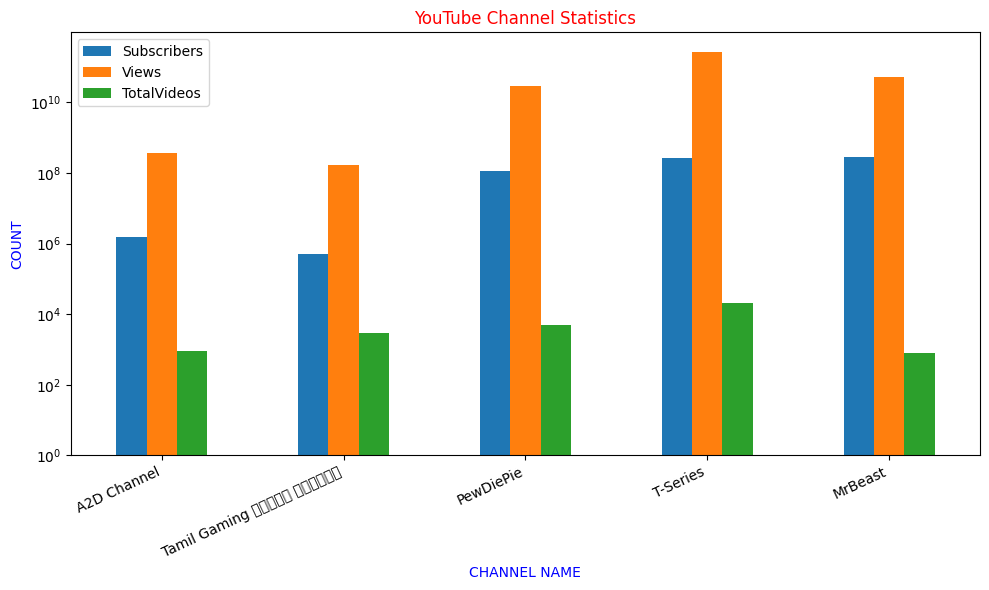

In [182]:
channelstats.plot(kind='bar', x='ChannelName', y=['Subscribers', 'Views', 'TotalVideos'], figsize=(10, 6),log = True)
plt.title('YouTube Channel Statistics',color = 'red')
plt.xlabel('CHANNEL NAME',color = 'blue')
plt.ylabel('COUNT',color = 'blue')
plt.xticks(rotation=25, ha='right')  
plt.tight_layout() 
plt.show()

